## Norm
*Norm* merupakan suatu fungsi yang mengkonversi vektor menjadi nilai besaran skalar, ditulis dengan notasi $\| \mathbf{x} \|$.

Salah satu kasus khusus *norm* adalah Euclidean norm, yaitu panjang vektor:

$$
\| \mathbf{x} \| = \sqrt{x_1^2 + \cdots + x_m^2} = \sqrt{\mathbf{x}^\top \mathbf{x}}
$$



Notasi norm dapat digunakan dalam berbagai pengukuran. Sebagai contoh: jarak, sudut, standar deviasi, korelasi.

Dengan menggunakan NumPy, norm dapat dihitung sebagai berikut:

In [29]:
import numpy as np

x = np.random.random(5)
print(f"x = {x}")

# Using basic functions
norm_x1 = np.sqrt(x @ x)
print(f"norm_x1 = {norm_x1}")

# Using np.linalg.norm
norm_x2 = np.linalg.norm(x)
print(f"norm_x2 = {norm_x2}")


x = [0.65236462 0.19578893 0.15082398 0.60838126 0.88904585]
norm_x1 = 1.283429411866906
norm_x2 = 1.283429411866906


#### Sifat-sifat norm

Diketahui vektor $\mathbf{x}, \mathbf{y} \in \mathbb{R}^m$ dan skalar $\beta$, beberapa sifat dari Euclidean norm adalah sebagai berikut:

1. *Nonnegative homogeneity*: $\| \beta \mathbf{x} \| = \beta \| \mathbf{x} \| $. 
2. *Triangle inequality*: $\| \mathbf{x} + \mathbf{y} \| \leq \| \mathbf{x} \| + \| \mathbf{y} \|$.
3. *Nonnegativity*: $\| \mathbf{x} \| \geq 0 $.
4. *Definiteness*: $\| \mathbf{x} \| = 0$ only if $\mathbf{x} = \mathbf{0}$.


### Jarak
Jarak antara dua vektor pada ruang Euclidean, $d: \mathbb{R}^m \times \mathbb{R}^m \rightarrow \mathbb{R}$ dapat ditulis dengan notasi *norm*:

$$
d(\mathbf{x}, \mathbf{y}) = \| \mathbf{x} - \mathbf{y} \|
$$

In [30]:
# Euclidean Distance measure
x = np.random.random(6)
y = np.random.random(6)

d = np.linalg.norm(x - y)
print(f"x: {x}")
print(f"y: {y}")
print(f"distance: {d}")

x: [0.70039609 0.86975058 0.63735342 0.61743903 0.56175046 0.44230057]
y: [0.51133786 0.81664448 0.03535545 0.6945623  0.24976213 0.76226974]
distance: 0.7788644345779154


### Nearest Neighbor
Mencari *tetangga terdekat* dari $\mathbf{x}$ pada suatu dataset $\mathcal{D} = \{ \mathbf{z}_1, \ldots, \mathbf{z}_n \}$ lalu mengembalikan index dari tetangga terdekat.

In [31]:
x = np.array([5, 6])
D = ([2, 1], [7, 2], [5.5, 4], [4, 8], [1, 5], [9, 6])

dists = [np.linalg.norm(x - D[i]) for i in range(len(D))]
nn_idx = np.argmin(dists)

print(f"dists: {dists}")
print(f"nn_idx: {nn_idx}")

dists: [5.830951894845301, 4.47213595499958, 2.0615528128088303, 2.23606797749979, 4.123105625617661, 4.0]
nn_idx: 2


### Sudut antar 2 vektor

Inner product dari 2 vektor $\mathbf{x}, \mathbf{y} \in \mathbb{R}^m$ dapat dinyatakan dalam norm dan sudut:

$$
\mathbf{x}^\top \mathbf{y} = \| \mathbf{x} \| \| \mathbf{y} \| \cos(\theta)
$$

Dengan demikian, didapatkan persamaan sudut antar 2 vektor:
$$
\theta = \arccos{\left( \frac{ \mathbf{x}^\top \mathbf{y} } {\| \mathbf{x} \| \| \mathbf{y} \|} \right)}
$$

In [32]:
ang = lambda x, y: np.arccos(x @ y / (np.linalg.norm(x) * np.linalg.norm(y)))

a = np.array([1, 2, -1])
b = np.array([2, 0, -3])

angle = ang(a, b) * 360 / (2 * np.pi)
print(f"angle : {angle}")

angle : 55.51861062801842


## Studi kasus: Clustering

In [33]:
def group_assignment(data, centroids):
    """
    Compute the distance between each centroid with each vector and assign the grouping according to the smallest distance.

    Args:
        data (list): list of vectors (n)
        centroids (list): list of centroids (k)

    Return:
        grouping_vec_c (list): list of groupings (n)
    """
    grouping_vec_c = np.zeros(len(data))

    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])

        min_dist = min(dist)

        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    
    return grouping_vec_c


def update_centroid(data, grouping, centroids):
    """
    Update the centroid after the group assignment, returning a new list of group centroids
    """
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids


def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj


def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
    new_centroids = update_centroid(data, grouping, centroids)
    J_obj = clustering_objective(data, grouping,new_centroids) 
    J_obj_vector.append(J_obj)
    iteration += 1
    if np.linalg.norm(np.array(new_centroids) -  np.array(centroids)) < 1e-3: 
        Stop = True
    else:
        centroids = new_centroids

    return new_centroids, grouping, J_obj_vector, iteration

In [35]:
import numpy as np
# Create synthetic data

m = 100
X = np.concatenate(
    [[0.3*np.random.randn(2) for i in range(m)],
     [[1,1] + 0.3*np.random.randn(2) for i in range(m)], 
     [[1,-1] + 0.3* np.random.randn(2) for i in range(m)]
    ]
)

print(X.shape)

(300, 2)


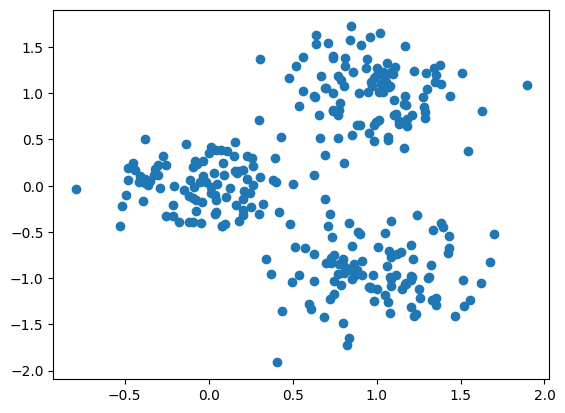

In [37]:
import matplotlib.pyplot as plt
plt.ion()
plt.scatter( X[:,0],X[:,1])
plt.show()

In [55]:
# Create centroids
import random

k = 5
centroids = [X[random.randrange(len(X))] for i in range(k)]
print(f"centroids: {centroids}")

centroids: [array([0.23126939, 0.32058773]), array([ 0.03759028, -0.10340901]), array([ 1.08133318, -1.37236673]), array([ 0.07787242, -0.43441629]), array([ 0.72954733, -0.78175721])]


In [56]:
dist = np.zeros((len(X), len(centroids)))

for i in range(len(X)):
    for j in range(len(centroids)):
        dist[i,j] = np.linalg.norm(X[i] - centroids[j])

grouping: [2 2 2 1 2 4 2 4 2 2 1 4 4 4 1 4 1 2 1 1 1 1 5 2 2 1 2 2 1 1 4 2 1 1 2 2 2
 5 2 4 2 2 2 2 1 4 2 1 1 2 2 1 1 1 2 2 1 1 1 4 2 2 1 2 4 2 4 2 2 2 1 2 1 4
 2 2 2 2 5 4 2 1 1 2 1 2 4 2 4 2 2 2 1 2 4 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 3 3 5 3 5 3 3 5 5 5 3 5 5 3 5 5 5 5 5 3 5
 5 5 3 3 3 4 5 5 5 5 3 3 5 3 3 3 3 3 3 5 5 5 3 3 5 3 3 3 5 3 5 5 5 3 5 3 5
 5 5 3 5 5 3 3 5 5 5 5 5 3 5 3 3 3 3 5 5 3 3 3 5 5 5 5 5 5 5 3 3 5 3 3 5 5
 5 3 3 5]


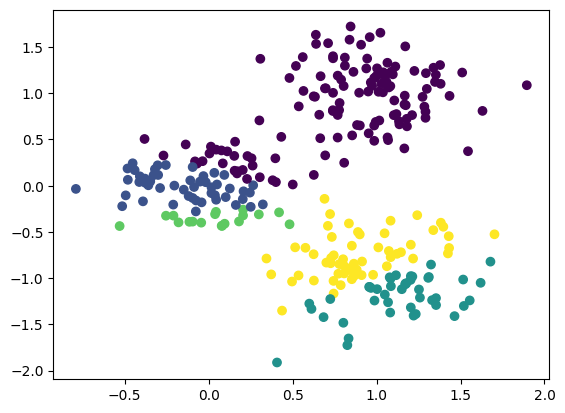

In [57]:
grouping = np.argmin(dist, axis=1) + 1
print(f"grouping: {grouping}")

# Plot the data with the centroids
plt.scatter(X[:,0], X[:,1], c=grouping)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_
group_representative = kmeans.cluster_centers_
J_clust = kmeans.inertia_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
